In [1]:
import os

import numpy as np 
import pandas as pd
import seaborn as sns
#from google.colab import drive
import matplotlib.pyplot as plt 

%matplotlib inline

#drive.mount('/gdrive')

In [2]:
## Meu caminho google drive
#X_train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/train.csv', sep = ',')
#X_test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/test.csv', sep = ',')

## Caminho de localhost
folder = 'dataset'
X_train = pd.read_csv(folder+'/train.csv', sep = ',')
X_test = pd.read_csv(folder+'/test.csv', sep = ',')


In [3]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train = X_train
df_test = X_test

# 1) Correlação 
* Escolhendo os 10 atributos com maior correlação com o SalePrice

In [5]:
corr = X_train.corr()
corr['SalePrice'].sort_values(ascending = False)[:11]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [6]:
X_train = X_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']]
X_test = X_test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]

# 2) Exploração inicial

In [7]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000


In [8]:
X_train.dtypes

OverallQual     int64
GrLivArea       int64
GarageCars      int64
GarageArea      int64
TotalBsmtSF     int64
1stFlrSF        int64
FullBath        int64
TotRmsAbvGrd    int64
YearBuilt       int64
YearRemodAdd    int64
SalePrice       int64
dtype: object

### 2.1) Medidas de centralidade e dispersão

In [9]:
#X_train.describe()
X_train.columns

for i in X_train.columns:
  print("Coluna: ", i)
  print("Média: ", X_train[i].mean())
  print("Mediana: ", X_train[i].median())
  print("Desvio padrão: ", X_train[i].std())
  print("Diferença Média e mediana: ", abs(X_train[i].mean() - X_train[i].median()))
  print('\n\n')

Coluna:  OverallQual
Média:  6.0993150684931505
Mediana:  6.0
Desvio padrão:  1.3829965467415934
Diferença Média e mediana:  0.09931506849315053



Coluna:  GrLivArea
Média:  1515.463698630137
Mediana:  1464.0
Desvio padrão:  525.4803834232025
Diferença Média e mediana:  51.46369863013706



Coluna:  GarageCars
Média:  1.7671232876712328
Mediana:  2.0
Desvio padrão:  0.7473150101111095
Diferença Média e mediana:  0.23287671232876717



Coluna:  GarageArea
Média:  472.9801369863014
Mediana:  480.0
Desvio padrão:  213.80484145338042
Diferença Média e mediana:  7.019863013698625



Coluna:  TotalBsmtSF
Média:  1057.4294520547944
Mediana:  991.5
Desvio padrão:  438.7053244594708
Diferença Média e mediana:  65.92945205479441



Coluna:  1stFlrSF
Média:  1162.626712328767
Mediana:  1087.0
Desvio padrão:  386.5877380410744
Diferença Média e mediana:  75.6267123287671



Coluna:  FullBath
Média:  1.5650684931506849
Mediana:  2.0
Desvio padrão:  0.5509158012954317
Diferença Média e mediana:  0.

### 2.2) Boxplots

No handles with labels found to put in legend.


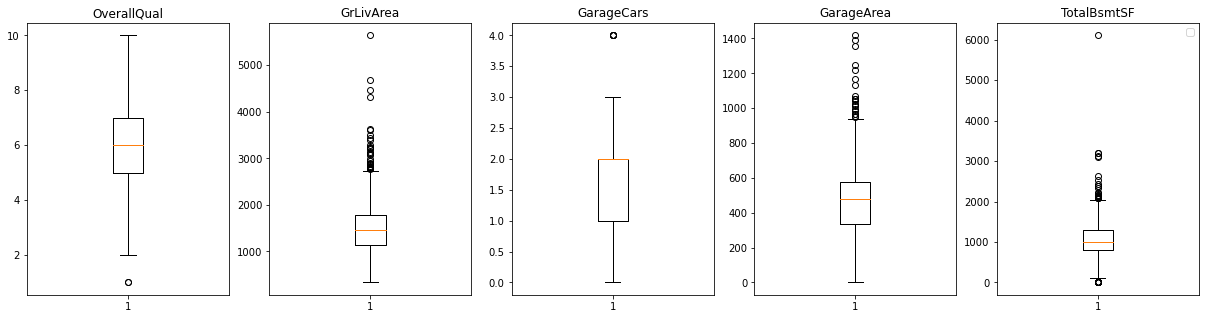

In [10]:
plt.figure(figsize = (21, 5))

plt.subplot(1, 5, 1)
plt.boxplot(X_train['OverallQual'])
plt.title("OverallQual")

plt.subplot(1, 5, 2) # Criando subplot 2
plt.boxplot(X_train['GrLivArea'])
plt.title("GrLivArea")

plt.subplot(1, 5, 3) 
plt.boxplot(X_train['GarageCars'])
plt.title("GarageCars")

plt.subplot(1, 5, 4) 
plt.boxplot(X_train['GarageArea'])
plt.title("GarageArea")

plt.subplot(1, 5, 5) 
plt.boxplot(X_train['TotalBsmtSF'])
plt.title("TotalBsmtSF")

plt.legend()

Text(0.5, 1.0, 'YearRemodAdd')

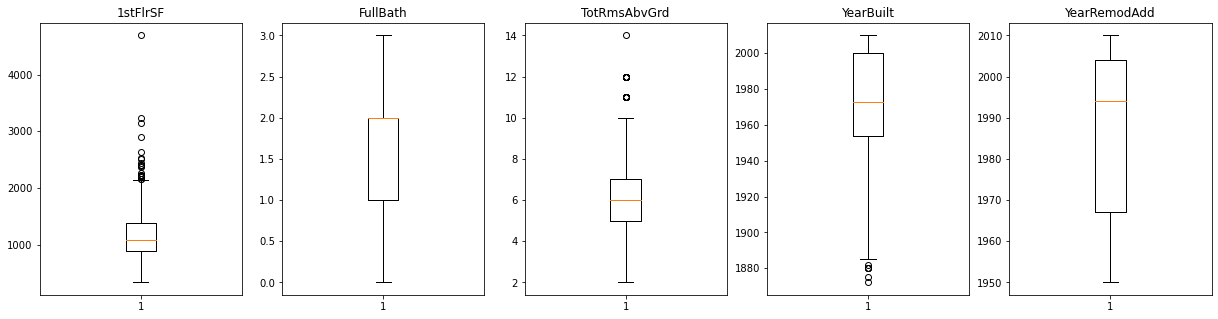

In [11]:
plt.figure(figsize = (21, 5))

plt.subplot(1, 5, 1)
plt.boxplot(X_train['1stFlrSF'])
plt.title("1stFlrSF")

plt.subplot(1, 5, 2) # Criando subplot 2
plt.boxplot(X_train['FullBath'])
plt.title("FullBath")

plt.subplot(1, 5, 3) 
plt.boxplot(X_train['TotRmsAbvGrd'])
plt.title("TotRmsAbvGrd")

plt.subplot(1, 5, 4) 
plt.boxplot(X_train['YearBuilt'])
plt.title("YearBuilt")

plt.subplot(1, 5, 5) 
plt.boxplot(X_train['YearRemodAdd'])
plt.title("YearRemodAdd")


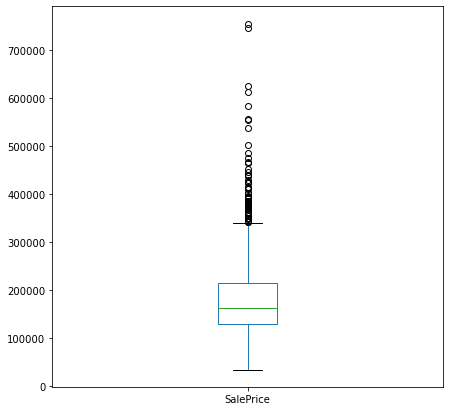

In [12]:
plt.figure(figsize = (7, 7))

X_train['SalePrice'].plot.box()

# 3) Visualização de dados

### 3.1) Dispersão

Text(0.5, 1.0, '1stFlrSF x SalePrice')

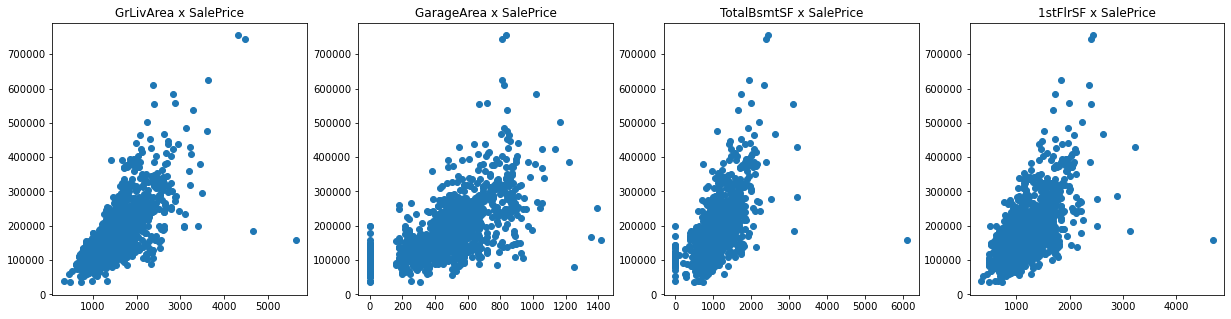

In [13]:
plt.figure(figsize = (21, 5))

plt.subplot(1, 4, 1)
plt.scatter(X_train['GrLivArea'], X_train['SalePrice'], marker='o');
#plt.xlabel('GrLivArea')
#plt.ylabel('SalePrice')
plt.title('GrLivArea x SalePrice')

plt.subplot(1, 4, 2)
plt.scatter(X_train['GarageArea'], X_train['SalePrice'], marker='o');
#plt.xlabel('GarageArea')
#plt.ylabel('SalePrice')
plt.title('GarageArea x SalePrice')

plt.subplot(1, 4, 3)
plt.scatter(X_train['TotalBsmtSF'], X_train['SalePrice'], marker='o');
#plt.xlabel('TotalBsmtSF')
#plt.ylabel('SalePrice')
plt.title('TotalBsmtSF x SalePrice')

plt.subplot(1, 4, 4)
plt.scatter(X_train['1stFlrSF'], X_train['SalePrice'], marker='o');
#plt.xlabel('1stFlrSF')
#plt.ylabel('SalePrice')
plt.title('1stFlrSF x SalePrice')


### 3.2) Histograma

C:\Users\55879\miniconda3\envs\learnmc\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


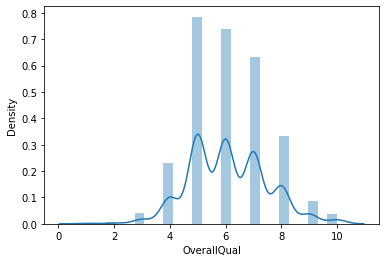

In [14]:
sns.distplot(X_train['OverallQual'])

C:\Users\55879\miniconda3\envs\learnmc\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


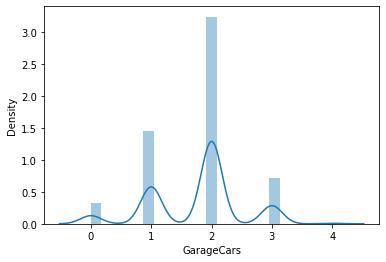

In [15]:
sns.distplot(X_train['GarageCars'])

C:\Users\55879\miniconda3\envs\learnmc\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


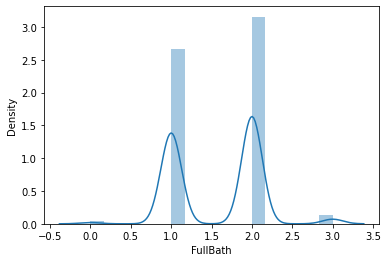

In [16]:
sns.distplot(X_train['FullBath'])

C:\Users\55879\miniconda3\envs\learnmc\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


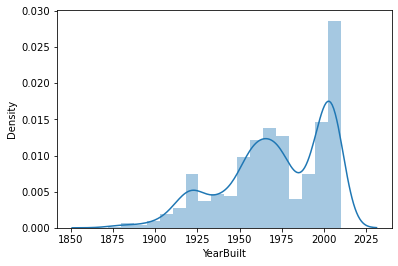

In [17]:
sns.distplot(X_train['YearBuilt'])

C:\Users\55879\miniconda3\envs\learnmc\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


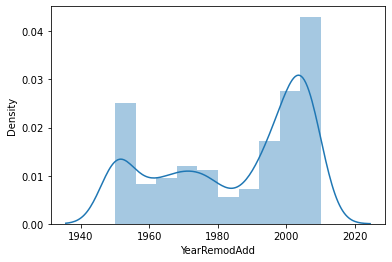

In [18]:
sns.distplot(X_train['YearRemodAdd'])

# 4) Limpeza e Transformação

### 4.1) Limpeza dos dados

**Verificando se há linhas com valores nulos e quais colunas contém mais valores nulos**

In [19]:
print(f"size train:{len(df_train)}, size test:{len(df_test)}")

size train:1460, size test:1459


<BarContainer object of 81 artists>

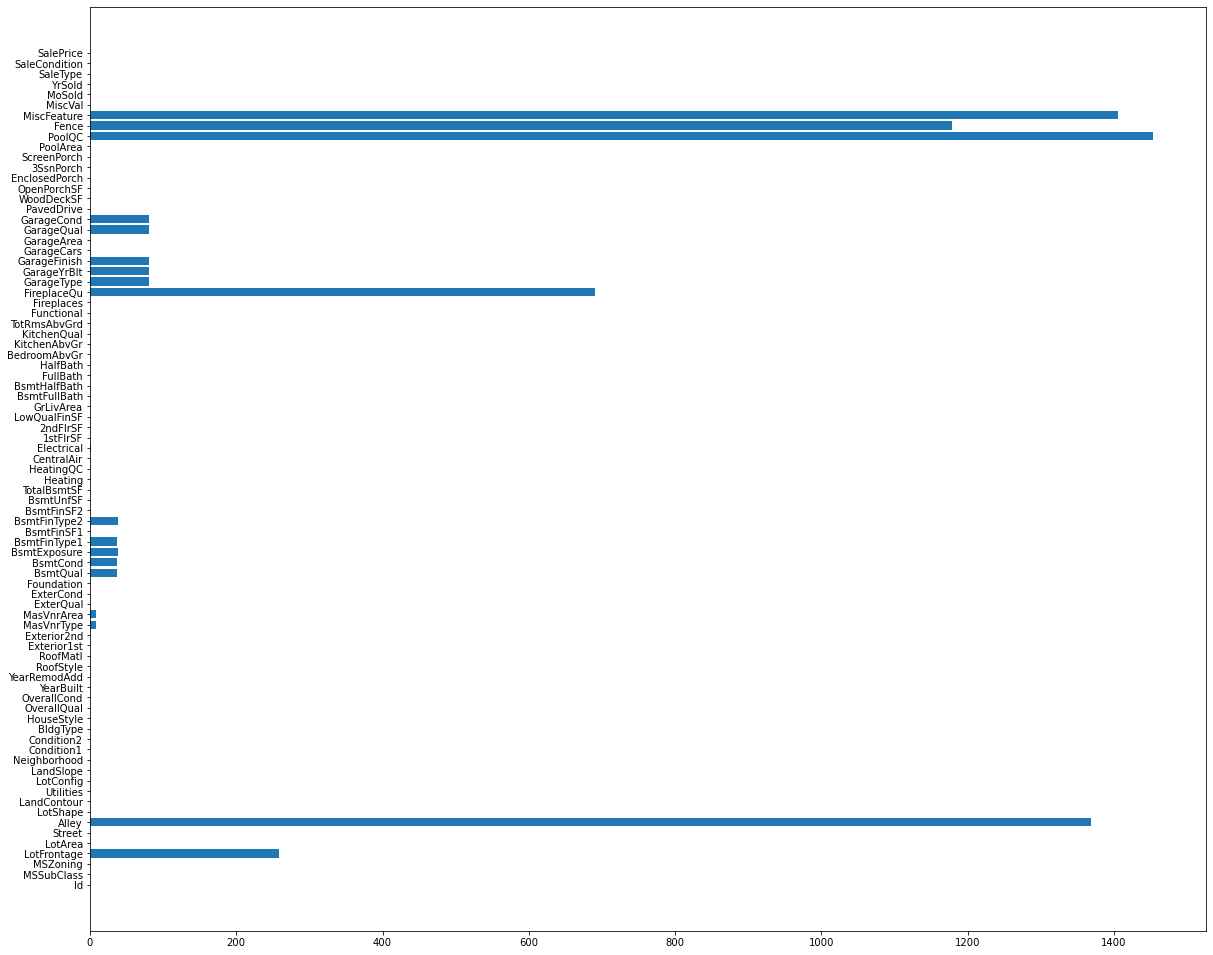

In [20]:
plt.figure(figsize = (20,17))
plt.barh(df_train.columns,df_train.isnull().sum())

<BarContainer object of 80 artists>

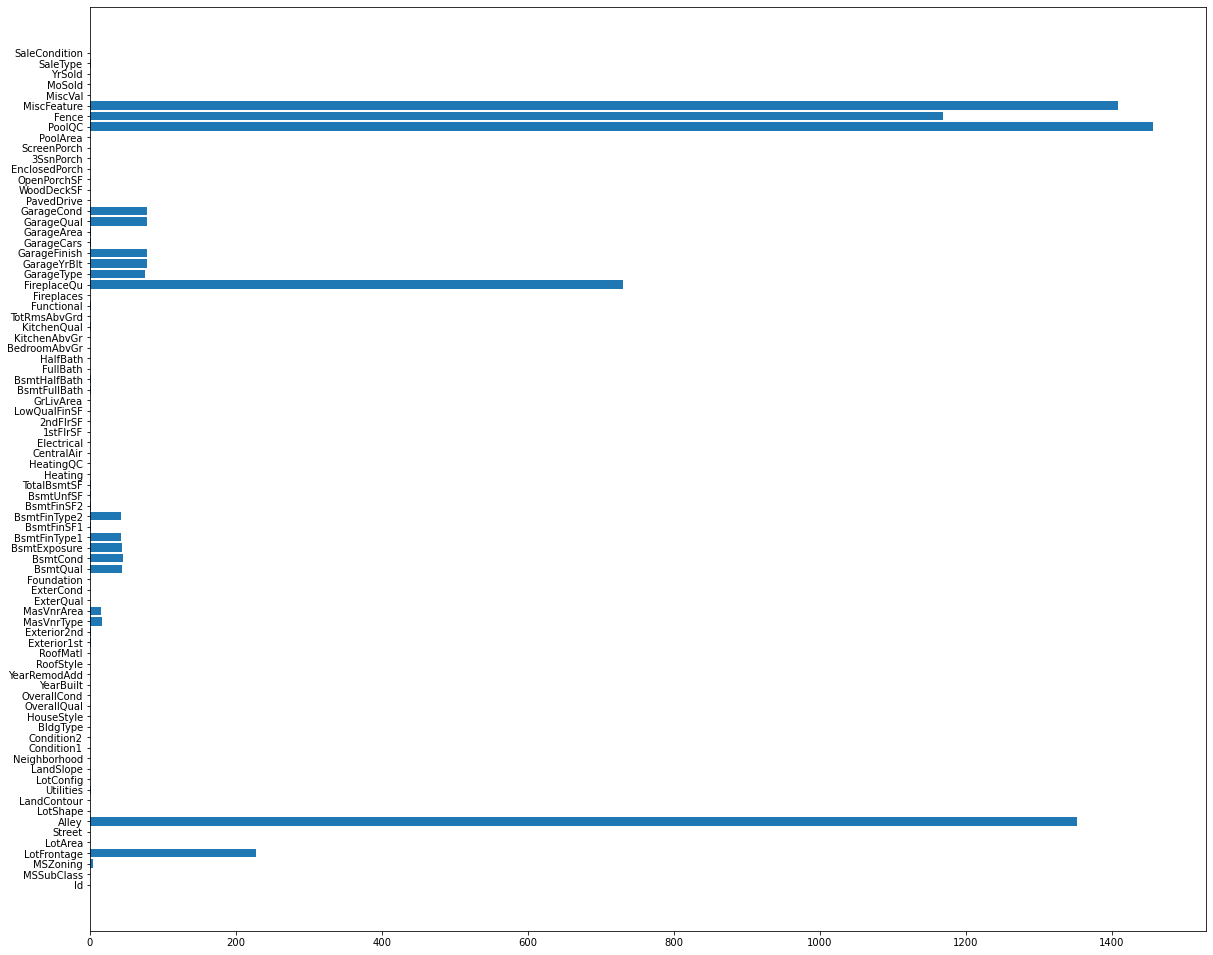

In [21]:
plt.figure(figsize = (20,17))
plt.barh(df_test.columns,df_test.isnull().sum())

**Colunas com mais valores faltantes**

In [22]:
df_train.isnull().sum().sort_values(ascending=False)[:25].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Utilities', 'YearRemodAdd',
       'MSSubClass', 'Foundation', 'ExterCond', 'ExterQual'],
      dtype='object')

In [23]:
df_test.isnull().sum().sort_values(ascending=False)[:25]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

**Retirando colunas com mais de 227 valores faltantes**

In [24]:
null_columns = list(df_test.isnull().sum().sort_values(ascending=False)[:5].index)
null_columns

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [25]:
df_train.drop(null_columns,axis = 1,inplace = True)
df_test.drop(null_columns,axis = 1,inplace = True)

**Retirando linhas com dados faltantes**

In [26]:
print(f"size train:{len(df_train)}, size test:{len(df_test)}")

size train:1460, size test:1459


In [27]:
df_train.dropna(axis = 0, inplace = True)
df_test.dropna(axis = 0, inplace = True)

In [28]:
print(f"size train:{len(df_train)}, size test:{len(df_test)}")

size train:1094, size test:1108


### 4.2) Transformação dos dados

**Tranformando variáveis categoricas**

In [29]:
df_train.dtypes.value_counts()

object     38
int64      35
float64     3
dtype: int64

In [30]:
def get_OHE(data):
    obj = []
    el = []
    for i,t in enumerate(data.dtypes):
        if t == 'object':
            obj.append(df_train.columns[i])
        else:
            el.append(df_train.columns[i])
            
    df_OHE = pd.concat([data[el],pd.get_dummies(data[obj],drop_first=True)] ,axis=1)
    return df_OHE
        

In [31]:
train = get_OHE(df_train)
test = get_OHE(df_test)

In [32]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
